# Importovanie knižníc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
import sklearn
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
df=pd.read_csv('/content/adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Popis údajov

Zdroj údajov: [Adult Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult)

| Atribút         | Popis                                                                                        |
|:----------------|:---------------------------------------------------------------------------------------------|
| age             | Vek osoby                                                         |
| workclass       | Kategória zamestnania, napr. Private, Self-emp-not-inc, Federal-gov, Local-gov, Without-pay. |
| fnlwgt          | Váha vzorky osoby reprezentujúca veľkosť populácie, ktorú táto osoba zastupuje. |
| education       | Najvyšší dosiahnutý stupeň vzdelania, napr. Bachelors, HS-grad, Doctorate, Masters.          |
| education-num   | Numerická reprezentácia vzdelania (kontinuálne).                                             |
| marital-status  | Rodinný stav, napr. Married-civ-spouse, Never-married, Divorced, Widowed, Separated.         |
| occupation      | Typ povolania, napr. Tech-support, Sales, Exec-managerial, Prof-specialty, Adm-clerical.     |
| relationship    | Typ vzťahu v domácnosti, napr. Wife, Husband, Not-in-family, Own-child, Unmarried.           |
| race            | Rasa osoby, napr. White, Asian-Pac-Islander, Amer-Indian-Eskimo, Black, Other.              |
| sex             | Pohlavie osoby: Female, Male.                                                               |
| capital-gain    | Kapitálový zisk mimo bežného príjmu .                                   |
| capital-loss    | Kapitálová strata mimo bežného príjmu .                                 |
| hours-per-week  | Počet hodín odpracovaných za týždeň .                                   |
| native-country  | Rodná krajina osoby, napr. United-States, Cambodia, England, India, Germany.                |
| income          | Cieľová hodnota: >50K , <=50K . |
"""

# Načítanie údajov

In [ ]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race',
    'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
]

df = pd.read_csv('/content/adult.csv', names=column_names, skipinitialspace=True)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zistenie null hodnôt

In [ ]:
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


# Vyplnenie null hodnot, podla najcastejsej hodnoty

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


<ipython-input-4-016be4220c2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# Vyplnené hodnoty

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Dátové typy a zistenie NaN hodnôt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# **Brief Exploration** Race/Sex

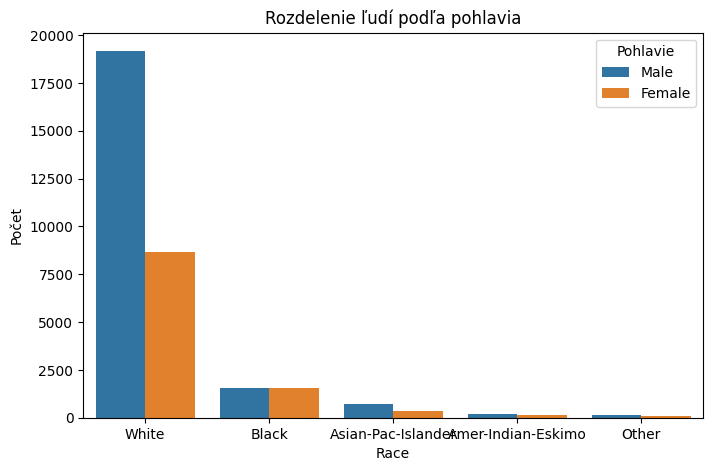

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='race', hue='sex')
plt.title('Rozdelenie ľudí podľa pohlavia')
plt.xlabel('Race')
plt.ylabel('Počet')
plt.legend(title='Pohlavie')
plt.show()

# Brief exploration Race

Text(0.5, 0, 'Race')

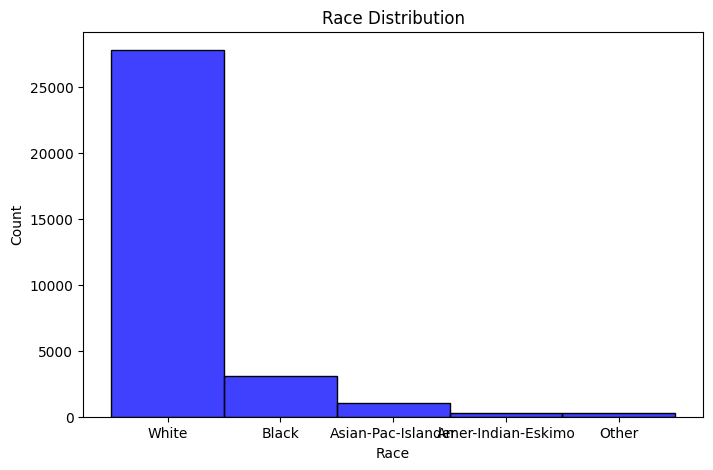

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='race',color='blue')
plt.title('Race Distribution')
plt.xlabel('Race')

# Brief exploration workclass/income

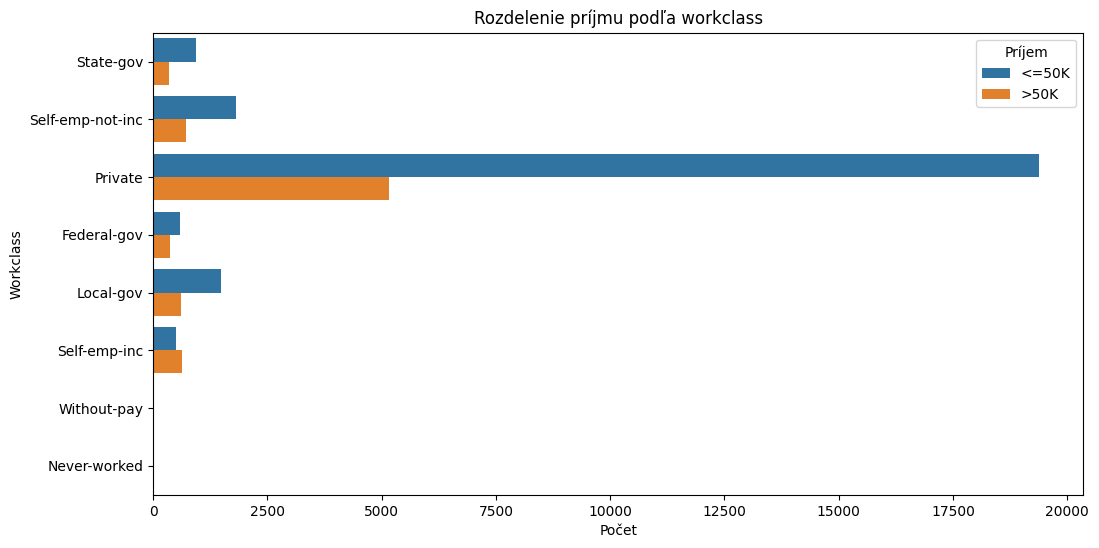

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='workclass', hue='income')
plt.title('Rozdelenie príjmu podľa workclass')
plt.xlabel('Počet')
plt.ylabel('Workclass')
plt.legend(title='Príjem')
plt.show()

# Brief exploration - age

Text(0.5, 0, 'Age')

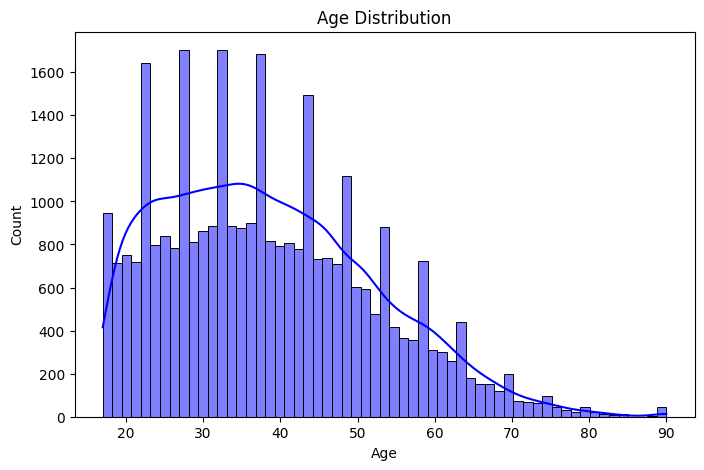

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age',color='blue',kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')


# Brief exploration - income

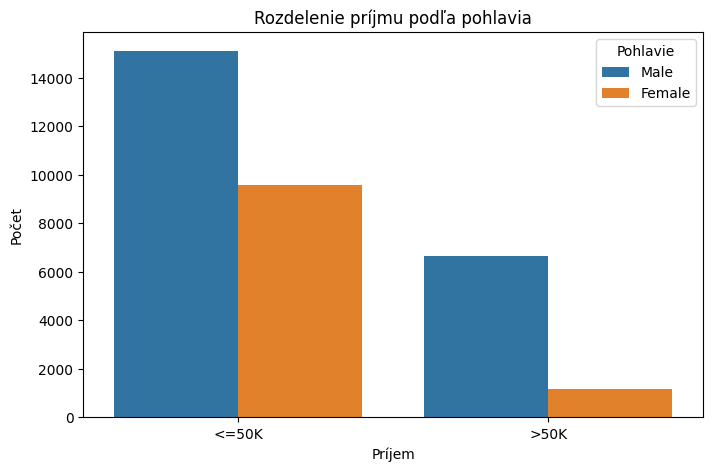

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='income', hue='sex')
plt.title('Rozdelenie príjmu podľa pohlavia')
plt.xlabel('Príjem')
plt.ylabel('Počet')
plt.legend(title='Pohlavie')
plt.show()


# Brief exploration - income, education

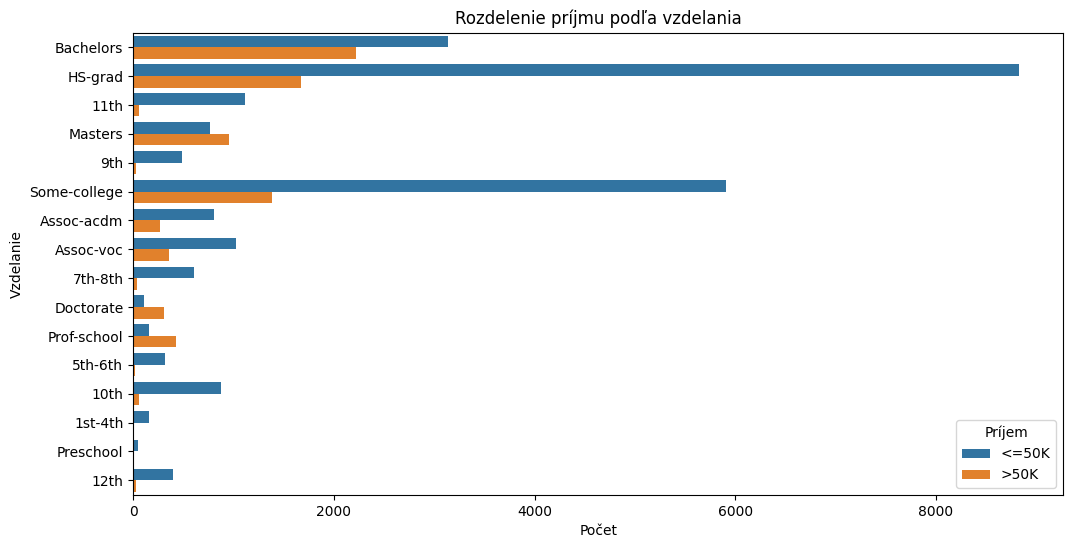

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='education', hue='income')
plt.title('Rozdelenie príjmu podľa vzdelania')
plt.xlabel('Počet')
plt.ylabel('Vzdelanie')
plt.legend(title='Príjem')
plt.show()


# Brief exploration - income, house-per-week

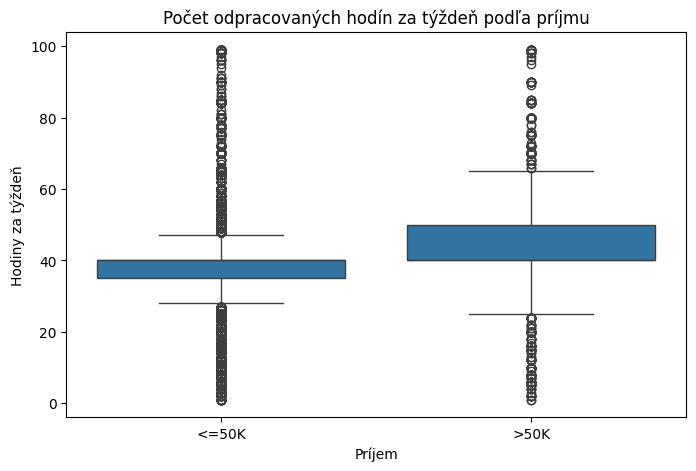

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Počet odpracovaných hodín za týždeň podľa príjmu')
plt.xlabel('Príjem')
plt.ylabel('Hodiny za týždeň')
plt.show()


In [ ]:
df.nlargest(5,'age')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K


In [ ]:
df.nsmallest(5,'age')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
106,17,Private,304873,10th,6,Never-married,Prof-specialty,Own-child,White,Female,34095,0,32,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
262,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
271,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
335,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,48,Mexico,<=50K


# Preprocessing dát

In [ ]:
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])


In [ ]:
df.drop('fnlwgt', axis=1, inplace=True)


In [ ]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})


In [ ]:
df['capital-gain'] = scaler.fit_transform(df[['capital-gain']])
df['capital-loss'] = scaler.fit_transform(df[['capital-loss']])


In [ ]:
df['hours-per-week'] = scaler.fit_transform(df[['hours-per-week']])


In [ ]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,0.02174,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0.00000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0.00000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.00000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.00000,0.0,0.397959,Cuba,0


# Encode - workclass

In [ ]:
df.workclass.value_counts()

,count
workclass,
Private,24532
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
workclass_categories = [
    'Private', 'Self-emp-not-inc', 'Local-gov',
    'State-gov', 'Self-emp-inc', 'Federal-gov',
    'Without-pay', 'Never-worked'
]


In [ ]:

enc_workclass = OrdinalEncoder(categories=[workclass_categories])
enc_workclass.fit_transform(df[['workclass']])[:, 0][:10]



array([3., 1., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
df.loc[:, 'workclass'] = enc_workclass.fit_transform(df[['workclass']])[:, 0]

# Encode - education

In [ ]:
df.education.value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [ ]:
education_categories = [
    'HS-grad', 'Some-college', 'Bachelors', 'Masters',
    '11th', '9th', '12th', '7th-8th', 'Prof-school',
    '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool', 'Assoc-acdm',
    'Assoc-voc'
]


In [ ]:
enc_education = OrdinalEncoder(categories=[education_categories])
enc_education.fit_transform(df[['education']])[:, 0][:10]

array([2., 2., 0., 4., 2., 3., 5., 0., 3., 2.])

In [ ]:
df.loc[:, 'education'] = enc_education.fit_transform(df[['education']])[:, 0]

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,3.0,2.0,13,Never-married,Adm-clerical,Not-in-family,White,1,0.02174,0.0,0.397959,United-States,0
1,0.452055,1.0,2.0,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0.00000,0.0,0.122449,United-States,0
2,0.287671,0.0,0.0,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0.00000,0.0,0.397959,United-States,0
3,0.493151,0.0,4.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.00000,0.0,0.397959,United-States,0
4,0.150685,0.0,2.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.00000,0.0,0.397959,Cuba,0


# Encode - marital status

In [ ]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [ ]:
marital_categories = [
    'Married-civ-spouse', 'Divorced', 'Never-married',
    'Separated', 'Widowed', 'Married-spouse-absent',
    'Married-AF-spouse'
]


In [ ]:
enc_marital = OrdinalEncoder(categories=[marital_categories])
enc_marital.fit_transform(df[['marital-status']])[:, 0][:10]

array([2., 0., 1., 0., 0., 0., 5., 0., 2., 0.])

In [ ]:
df.loc[:, 'marital-status'] = enc_marital.fit_transform(df[['marital-status']])[:, 0]

In [ ]:
df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,3.0,2.0,13,2.0,Adm-clerical,Not-in-family,White,1,0.021740,0.0,0.397959,United-States,0
1,0.452055,1.0,2.0,13,0.0,Exec-managerial,Husband,White,1,0.000000,0.0,0.122449,United-States,0
2,0.287671,0.0,0.0,9,1.0,Handlers-cleaners,Not-in-family,White,1,0.000000,0.0,0.397959,United-States,0
3,0.493151,0.0,4.0,7,0.0,Handlers-cleaners,Husband,Black,1,0.000000,0.0,0.397959,United-States,0
4,0.150685,0.0,2.0,13,0.0,Prof-specialty,Wife,Black,0,0.000000,0.0,0.397959,Cuba,0
5,0.273973,0.0,3.0,14,0.0,Exec-managerial,Wife,White,0,0.000000,0.0,0.397959,United-States,0
6,0.438356,0.0,5.0,5,5.0,Other-service,Not-in-family,Black,0,0.000000,0.0,0.153061,Jamaica,0
7,0.479452,1.0,0.0,9,0.0,Exec-managerial,Husband,White,1,0.000000,0.0,0.448980,United-States,1
8,0.191781,0.0,3.0,14,2.0,Prof-specialty,Not-in-family,White,0,0.140841,0.0,0.500000,United-States,1
9,0.342466,0.0,2.0,13,0.0,Exec-managerial,Husband,White,1,0.051781,0.0,0.397959,United-States,1


# Encode - occupation

In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,5983
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


In [ ]:
occupation_categories = [
    'Prof-specialty', 'Craft-repair', 'Exec-managerial',
    'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct',
    'Transport-moving', 'Handlers-cleaners', 'Farming-fishing','Tech-support',
    'Protective-serv', 'Priv-house-serv', 'Armed-Forces'
]


In [ ]:
enc_occupation = OrdinalEncoder(categories=[occupation_categories])
enc_occupation.fit_transform(df[['occupation']])[:, 0][:10]

array([3., 2., 8., 8., 0., 2., 5., 2., 0., 2.])

In [ ]:
df.loc[:, 'occupation'] = enc_occupation.fit_transform(df[['occupation']])[:, 0]

# Encode - relationship

In [ ]:
df['relationship'].value_counts()

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [ ]:
relationship_categories = [
    'Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
    'Other-relative'
]


In [ ]:
enc_relationship = OrdinalEncoder(categories=[relationship_categories])
enc_relationship.fit_transform(df[['relationship']])[:, 0][:10]



array([1., 0., 1., 0., 2., 2., 1., 0., 1., 0.])

In [ ]:
df.loc[:, 'relationship'] = enc_relationship.fit_transform(df[['relationship']])[:, 0]

# Encode - race

In [ ]:
df['race'].value_counts()

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


In [ ]:
race_categories=[
    'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'
]

In [ ]:
enc_race=OrdinalEncoder(categories=[race_categories])
enc_race.fit_transform(df[['race']])[:,0][:10]

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

In [ ]:
df.loc[:, 'race'] = enc_race.fit_transform(df[['race']])[:, 0]

# Encode - native-country

In [ ]:
df['native-country'].value_counts()

,count
native-country,
United-States,29753
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [ ]:
native_categories = [
    'United-States', 'Mexico', 'Philippines', 'Germany', 'Canada',
    'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England',
    'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic',
    'Vietnam', 'Guatemala', 'Japan', 'Poland', 'Columbia',
    'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua',
    'Peru', 'France', 'Greece', 'Ecuador', 'Ireland',
    'Hong', 'Cambodia', 'Trinadad&Tobago', 'Laos', 'Thailand',
    'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary',
    'Scotland', 'Holand-Netherlands'
]


In [ ]:
enc_native = OrdinalEncoder(categories=[native_categories])
enc_native.fit_transform(df[['native-country']])[:, 0][:10]

array([ 0.,  0.,  0.,  0.,  8.,  0., 10.,  0.,  0.,  0.])

In [ ]:
df.loc[:, 'native-country'] = enc_native.fit_transform(df[['native-country']])[:, 0]

In [ ]:
df.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,3.0,2.0,13,2.0,3.0,1.0,0.0,1,0.021740,0.0,0.397959,0.0,0
1,0.452055,1.0,2.0,13,0.0,2.0,0.0,0.0,1,0.000000,0.0,0.122449,0.0,0
2,0.287671,0.0,0.0,9,1.0,8.0,1.0,0.0,1,0.000000,0.0,0.397959,0.0,0
3,0.493151,0.0,4.0,7,0.0,8.0,0.0,1.0,1,0.000000,0.0,0.397959,0.0,0
4,0.150685,0.0,2.0,13,0.0,0.0,2.0,1.0,0,0.000000,0.0,0.397959,8.0,0
5,0.273973,0.0,3.0,14,0.0,2.0,2.0,0.0,0,0.000000,0.0,0.397959,0.0,0
6,0.438356,0.0,5.0,5,5.0,5.0,1.0,1.0,0,0.000000,0.0,0.153061,10.0,0
7,0.479452,1.0,0.0,9,0.0,2.0,0.0,0.0,1,0.000000,0.0,0.448980,0.0,1
8,0.191781,0.0,3.0,14,2.0,0.0,1.0,0.0,0,0.140841,0.0,0.500000,0.0,1
9,0.342466,0.0,2.0,13,0.0,2.0,0.0,0.0,1,0.051781,0.0,0.397959,0.0,1


# Correlation Matrix

In [ ]:
scaler = MinMaxScaler()
columns_to_scale = df.columns.difference(['income'])
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df.head())


        age  workclass  education  education-num  marital-status  occupation  \
0  0.301370   0.428571   0.133333       0.800000        0.333333    0.230769   
1  0.452055   0.142857   0.133333       0.800000        0.000000    0.153846   
2  0.287671   0.000000   0.000000       0.533333        0.166667    0.615385   
3  0.493151   0.000000   0.266667       0.400000        0.000000    0.615385   
4  0.150685   0.000000   0.133333       0.800000        0.000000    0.000000   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0           0.2  0.00  1.0       0.02174           0.0        0.397959   
1           0.0  0.00  1.0       0.00000           0.0        0.122449   
2           0.2  0.00  1.0       0.00000           0.0        0.397959   
3           0.0  0.25  1.0       0.00000           0.0        0.397959   
4           0.4  0.25  0.0       0.00000           0.0        0.397959   

   native-country  income  
0             0.0       0  
1             0.0 

In [ ]:
df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.428571,0.133333,0.800000,0.333333,0.230769,0.2,0.00,1.0,0.021740,0.0,0.397959,0.00,0
1,0.452055,0.142857,0.133333,0.800000,0.000000,0.153846,0.0,0.00,1.0,0.000000,0.0,0.122449,0.00,0
2,0.287671,0.000000,0.000000,0.533333,0.166667,0.615385,0.2,0.00,1.0,0.000000,0.0,0.397959,0.00,0
3,0.493151,0.000000,0.266667,0.400000,0.000000,0.615385,0.0,0.25,1.0,0.000000,0.0,0.397959,0.00,0
4,0.150685,0.000000,0.133333,0.800000,0.000000,0.000000,0.4,0.25,0.0,0.000000,0.0,0.397959,0.20,0
5,0.273973,0.000000,0.200000,0.866667,0.000000,0.153846,0.4,0.00,0.0,0.000000,0.0,0.397959,0.00,0
6,0.438356,0.000000,0.333333,0.266667,0.833333,0.384615,0.2,0.25,0.0,0.000000,0.0,0.153061,0.25,0
7,0.479452,0.142857,0.000000,0.533333,0.000000,0.153846,0.0,0.00,1.0,0.000000,0.0,0.448980,0.00,1
8,0.191781,0.000000,0.200000,0.866667,0.333333,0.000000,0.2,0.00,0.0,0.140841,0.0,0.500000,0.00,1
9,0.342466,0.000000,0.133333,0.800000,0.000000,0.153846,0.0,0.00,1.0,0.051781,0.0,0.397959,0.00,1


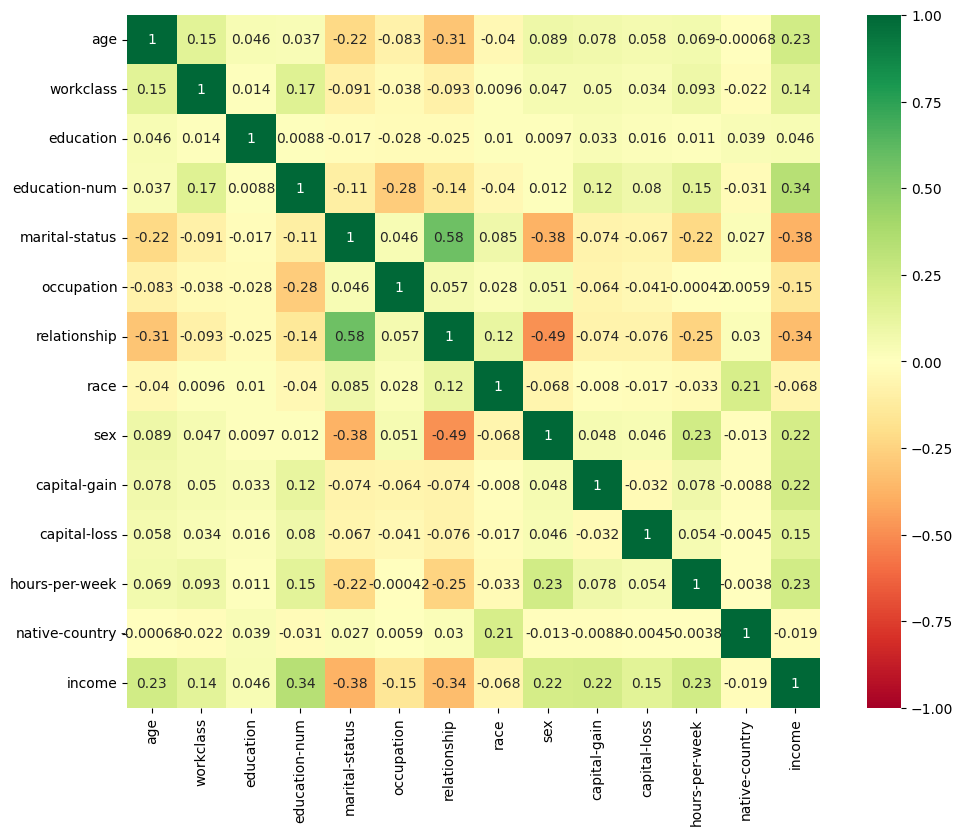

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, square=True)
plt.show()


age 0.23
sex 0.22
hours per week 0.23

marital status -0.38
relationship -0.34

# Train test split

In [ ]:
X = df.drop('income', axis=1)
y = df['income']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 13), (6513, 13), (26048,), (6513,))

# Decision Tree Classifier

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.8132964839551666

# 1experiment

In [ ]:
skf=KFold(n_splits=5)
scores=list()
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    clf=DecisionTreeClassifier(random_state=13)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    scores.append(f1_score(y_test,y_pred))
scores

[0.6050583657587548,
 0.5981675392670157,
 0.6113592852584556,
 0.6302250803858521,
 0.6316776007497656]

In [ ]:
np.mean(scores)

0.6152975742839688

In [ ]:
scores_global = []
for x in np.arange(2,25):
  skf=KFold(n_splits=5)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test=y.iloc[train_index],y.iloc[test_index]
      clf=DecisionTreeClassifier(max_depth=x,random_state=13)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.5568002741039809),
 (3, 0.6130515001010497),
 (4, 0.6176187441823374),
 (5, 0.6209644737791887),
 (6, 0.6387583260095933),
 (7, 0.6390132396291464),
 (8, 0.6528759354853415),
 (9, 0.6871284649631925),
 (10, 0.6801735468664025),
 (11, 0.6805949026934646)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
18,20,0.645726
19,21,0.642675
20,22,0.636163
21,23,0.632921
22,24,0.630960


<Axes: xlabel='max_depth', ylabel='f1'>

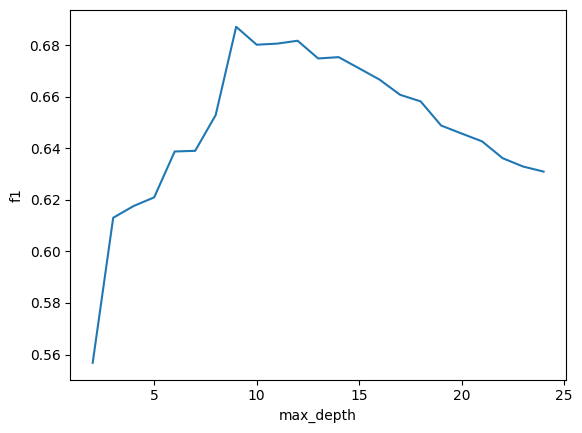

In [ ]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
7,9,0.687128
10,12,0.681711
9,11,0.680595
8,10,0.680174
12,14,0.675350


In [ ]:
scores_global = []
for x in np.arange(2, 50):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(2, 0.6152975742839688),
 (3, 0.6132086277857423),
 (4, 0.6160679506030954),
 (5, 0.6180689683002825),
 (6, 0.6269450864275029),
 (7, 0.6268205345416504),
 (8, 0.6323560820978844),
 (9, 0.6337216267841369),
 (10, 0.6380042811912082),
 (11, 0.6361807218850373)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
38,40,0.668789
39,41,0.668252
40,42,0.667762
41,43,0.668628
42,44,0.669217
43,45,0.669328
44,46,0.669830
45,47,0.670790
46,48,0.671470
47,49,0.670524


<Axes: xlabel='min_samples_split', ylabel='f1'>

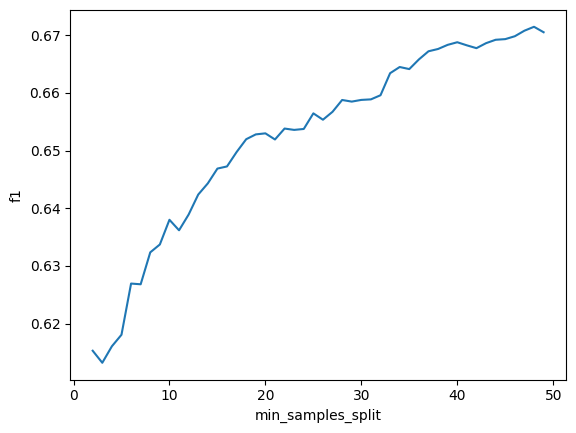

In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
46,48,0.671470
45,47,0.670790
47,49,0.670524
44,46,0.669830
43,45,0.669328


In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 9, min_samples_split = 48, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(0.6830893229854109, 0.6528343831048536, 0.706266318537859)

# 2experiment

In [ ]:
scores_global = []
for d in range(27, 50):
    for split in range(52, 100):
        skf = KFold(n_splits=5)
        scores = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = DecisionTreeClassifier(max_depth = d, min_samples_split = split, random_state = 13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            scores.append(f1_score(y_test, y_pred))
        scores_global.append((d, split, np.mean(scores)))

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'min_samples_split', 'f1'])
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,min_samples_split,f1
76,28,80,0.680884
28,27,80,0.680837
27,27,79,0.680804
75,28,79,0.680801
220,31,80,0.680788


In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 28, min_samples_split = 80, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(0.6808835371189723, 0.6673618352450469, 0.6932243786176371)

# 3experiment

In [ ]:
scores_global = []
for x in np.arange(25,50):
  skf=KFold(n_splits=5)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test=y.iloc[train_index],y.iloc[test_index]
      clf=DecisionTreeClassifier(max_depth=x,random_state=13)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(25, 0.6308189235331136),
 (26, 0.6277925934381997),
 (27, 0.6233050432249708),
 (28, 0.6200640304973819),
 (29, 0.6177512652239707),
 (30, 0.6162095392284771),
 (31, 0.6143359517188013),
 (32, 0.6157621118408277),
 (33, 0.6160040789870914),
 (34, 0.6164514953325948)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
20,45,0.615298
21,46,0.615298
22,47,0.615298
23,48,0.615298
24,49,0.615298


<Axes: xlabel='max_depth', ylabel='f1'>

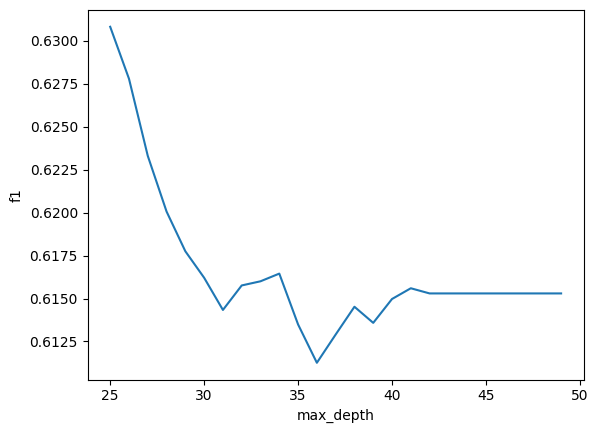

In [ ]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
0,25,0.630819
1,26,0.627793
2,27,0.623305
3,28,0.620064
4,29,0.617751


In [ ]:
scores_global = []
for x in np.arange(2, 40):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(2, 0.6152975742839688),
 (3, 0.6132086277857423),
 (4, 0.6160679506030954),
 (5, 0.6180689683002825),
 (6, 0.6269450864275029),
 (7, 0.6268205345416504),
 (8, 0.6323560820978844),
 (9, 0.6337216267841369),
 (10, 0.6380042811912082),
 (11, 0.6361807218850373)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
28,30,0.658790
29,31,0.658883
30,32,0.659600
31,33,0.663421
32,34,0.664495
33,35,0.664134
34,36,0.665808
35,37,0.667221
36,38,0.667621
37,39,0.668336


<Axes: xlabel='min_samples_split', ylabel='f1'>

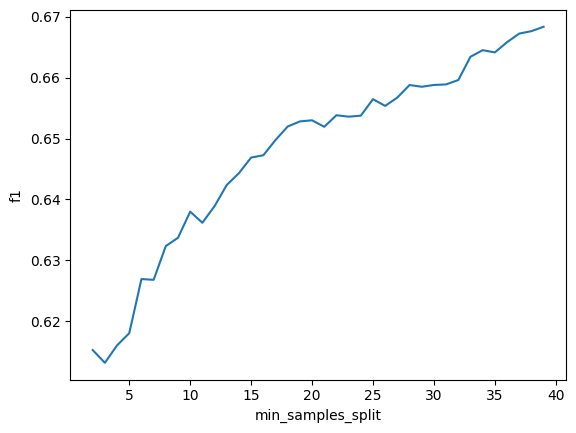

In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
37,39,0.668336
36,38,0.667621
35,37,0.667221
34,36,0.665808
32,34,0.664495


In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 25, min_samples_split = 30, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(0.6630353965251101, 0.6469770674079222, 0.6775919732441471)

# 4 experiment

In [ ]:
scores_global = []
for x in np.arange(2,50):
  skf=KFold(n_splits=5)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test=y.iloc[train_index],y.iloc[test_index]
      clf=DecisionTreeClassifier(max_depth=x,random_state=13)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.5568002741039809),
 (3, 0.6130515001010497),
 (4, 0.6176187441823374),
 (5, 0.6209644737791887),
 (6, 0.6387583260095933),
 (7, 0.6390132396291464),
 (8, 0.6528759354853415),
 (9, 0.6871284649631925),
 (10, 0.6801735468664025),
 (11, 0.6805949026934646)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
43,45,0.615298
44,46,0.615298
45,47,0.615298
46,48,0.615298
47,49,0.615298


<Axes: xlabel='max_depth', ylabel='f1'>

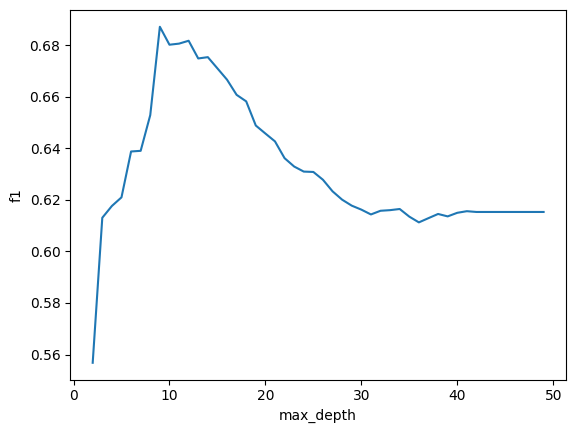

In [ ]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
7,9,0.687128
10,12,0.681711
9,11,0.680595
8,10,0.680174
12,14,0.675350


In [ ]:
scores_global = []
for x in np.arange(100, 150):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(100, 0.6783141123491911),
 (101, 0.6780312438941997),
 (102, 0.6782002155463397),
 (103, 0.6782438433239891),
 (104, 0.6785508877979188),
 (105, 0.6785102652053973),
 (106, 0.6784678868809592),
 (107, 0.6784705659572122),
 (108, 0.6785938929561844),
 (109, 0.6785001536277184)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
40,140,0.678942
41,141,0.678990
42,142,0.678661
43,143,0.678851
44,144,0.678764
45,145,0.679068
46,146,0.679703
47,147,0.679793
48,148,0.679797
49,149,0.680547


<Axes: xlabel='min_samples_split', ylabel='f1'>

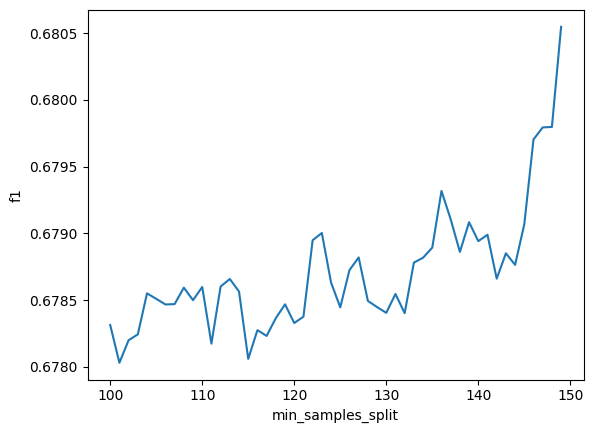

In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
49,149,0.680547
48,148,0.679797
47,147,0.679793
46,146,0.679703
36,136,0.679318


In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 9, min_samples_split = 149, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(0.6810176333092898, 0.6443949517446177, 0.7079127320091175)

# 5experiment

In [ ]:
scores_global = []
for x in np.arange(2,50):
  skf=KFold(n_splits=5)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test=y.iloc[train_index],y.iloc[test_index]
      clf=DecisionTreeClassifier(max_depth=x,random_state=13)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.5568002741039809),
 (3, 0.6130515001010497),
 (4, 0.6176187441823374),
 (5, 0.6209644737791887),
 (6, 0.6387583260095933),
 (7, 0.6389652510571227),
 (8, 0.6528279132704035),
 (9, 0.6870819065394772),
 (10, 0.6800786597089855),
 (11, 0.6805030629344944)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
43,45,0.615662
44,46,0.615662
45,47,0.615662
46,48,0.615662
47,49,0.615662


<Axes: xlabel='max_depth', ylabel='f1'>

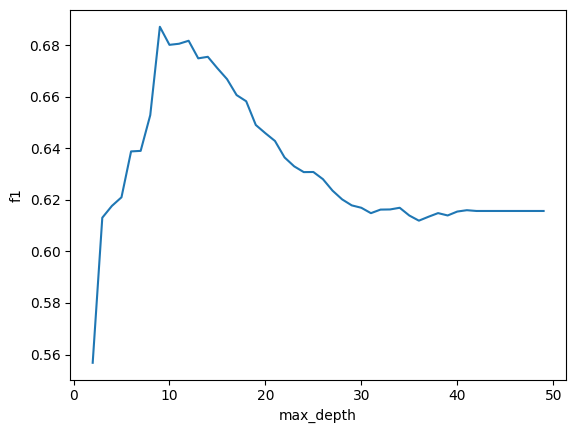

In [ ]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
7,9,0.687082
10,12,0.681665
9,11,0.680503
8,10,0.680079
12,14,0.675440


In [ ]:
scores_global = []
for x in np.arange(200, 250):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(200, 0.6794939080523437),
 (201, 0.6794939080523437),
 (202, 0.6794939080523437),
 (203, 0.6794939080523437),
 (204, 0.6798807153227289),
 (205, 0.6781157079551845),
 (206, 0.6781157079551845),
 (207, 0.6779739179391994),
 (208, 0.6780686754477573),
 (209, 0.6780212799990617)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
40,240,0.677236
41,241,0.677236
42,242,0.677236
43,243,0.676458
44,244,0.676365
45,245,0.676365
46,246,0.676365
47,247,0.675641
48,248,0.674792
49,249,0.675372


<Axes: xlabel='min_samples_split', ylabel='f1'>

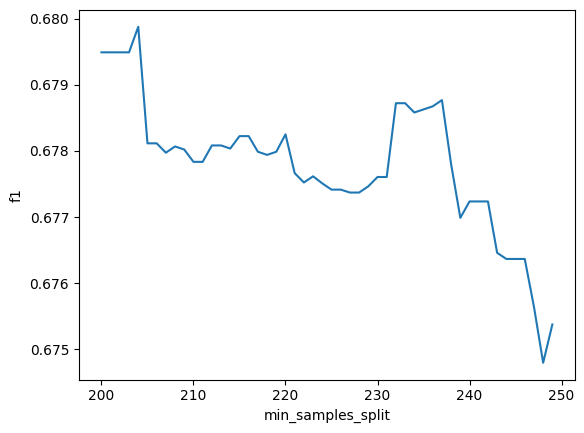

In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
4,204,0.679881
0,200,0.679494
2,202,0.679494
3,203,0.679494
1,201,0.679494


In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 9, min_samples_split = 204, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(0.6796844873278899, 0.6433358153387937, 0.704885993485342)

# 6 experiment


In [ ]:
scores_global = []
for x in np.arange(2,100):
  skf=KFold(n_splits=5)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test=y.iloc[train_index],y.iloc[test_index]
      clf=DecisionTreeClassifier(max_depth=x,random_state=13)
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.5568002741039809),
 (3, 0.6130515001010497),
 (4, 0.6176187441823374),
 (5, 0.6209644737791887),
 (6, 0.6387583260095933),
 (7, 0.6390132396291464),
 (8, 0.6528759354853415),
 (9, 0.6871284649631925),
 (10, 0.6801735468664025),
 (11, 0.6805949026934646)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
93,95,0.615298
94,96,0.615298
95,97,0.615298
96,98,0.615298
97,99,0.615298


<Axes: xlabel='max_depth', ylabel='f1'>

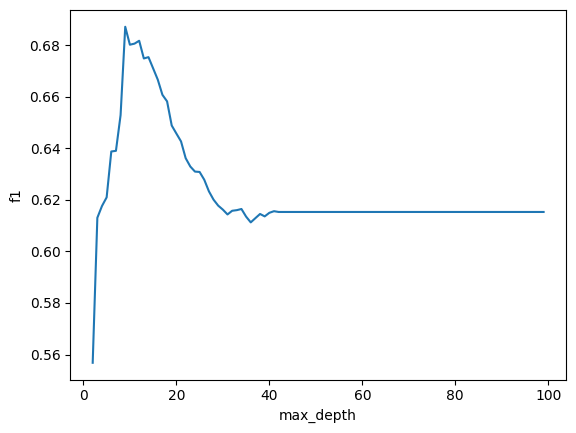

In [ ]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
7,9,0.687128
10,12,0.681711
9,11,0.680595
8,10,0.680174
12,14,0.675350


In [ ]:
scores_global = []
for x in np.arange(250, 300):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(250, 0.675276971084699),
 (251, 0.6776795177083835),
 (252, 0.6773655757839034),
 (253, 0.6773655757839034),
 (254, 0.677126603494786),
 (255, 0.6770318732421972),
 (256, 0.6770318732421972),
 (257, 0.6772779780525052),
 (258, 0.6771702136763229),
 (259, 0.6771702136763229)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
40,290,0.675107
41,291,0.675203
42,292,0.675154
43,293,0.675154
44,294,0.675154
45,295,0.675154
46,296,0.675154
47,297,0.675154
48,298,0.675107
49,299,0.675107


<Axes: xlabel='min_samples_split', ylabel='f1'>

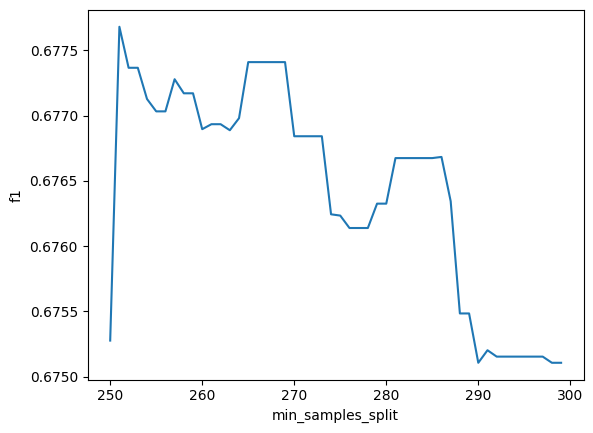

In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
1,251,0.677680
19,269,0.677409
15,265,0.677409
18,268,0.677409
17,267,0.677409


In [ ]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 9, min_samples_split = 251, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(0.6761930275620018, 0.6402985074626866, 0.704885993485342)

# GradientBoostingClas

# 7 experiment

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
scores_gb = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = GradientBoostingClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_gb.append(f1_score(y_test, y_pred))
scores_gb

[0.6769895570759813,
 0.6768336964415396,
 0.6948790896159317,
 0.6910010842067221,
 0.6940509915014165]

In [ ]:
np.mean(scores_gb)

0.6867508837683183

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(2, 20):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(n_estimators=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(2, 0.0),
 (3, 0.0),
 (4, 0.31811968833490234),
 (5, 0.31811968833490234),
 (6, 0.31811968833490234),
 (7, 0.3414839018120742),
 (8, 0.376763985043446),
 (9, 0.5430601915619416),
 (10, 0.586663815129559),
 (11, 0.5883277860188191)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['n_estimators','f1'])
df_res.tail()

,n_estimators,f1
13,15,0.601130
14,16,0.603789
15,17,0.607136
16,18,0.610571
17,19,0.615550


<Axes: xlabel='n_estimators', ylabel='f1'>

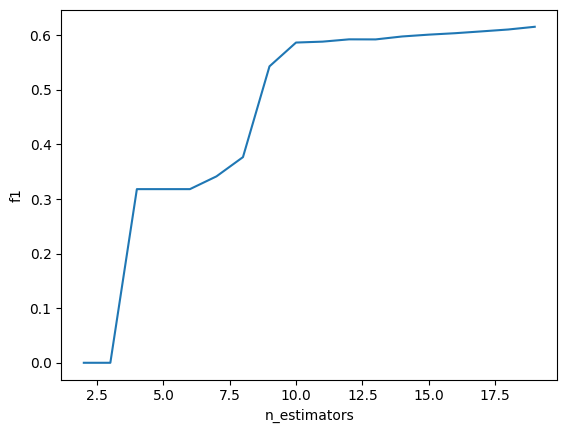

In [ ]:
sns.lineplot(data=df_res,x='n_estimators',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,n_estimators,f1
17,19,0.615550
16,18,0.610571
15,17,0.607136
14,16,0.603789
13,15,0.601130


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(n_estimators = 19, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6011146496815286,
 0.6024,
 0.6220472440944882,
 0.6231940648184303,
 0.6289945440374123]

In [ ]:
np.mean(gb_scores_default)

0.6155501005263719

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.6155501005263719 0.6011146496815286 0.6289945440374123




# 8 experiment

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(20, 45):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(n_estimators=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(20, 0.6172736044340225),
 (21, 0.6196249418518454),
 (22, 0.619645076990291),
 (23, 0.6220457058610575),
 (24, 0.6235559211289496),
 (25, 0.6246659114112187),
 (26, 0.626275316850907),
 (27, 0.6262492499526287),
 (28, 0.6277308408994285),
 (29, 0.6286146577605608)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['n_estimators','f1'])
df_res.tail()

,n_estimators,f1
20,40,0.649645
21,41,0.651793
22,42,0.652752
23,43,0.655517
24,44,0.654619


<Axes: xlabel='n_estimators', ylabel='f1'>

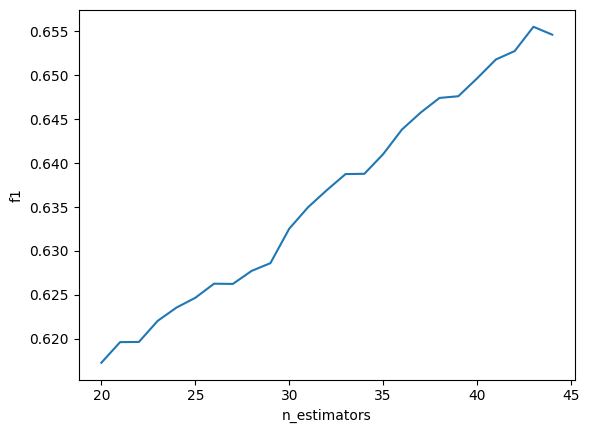

In [ ]:
sns.lineplot(data=df_res,x='n_estimators',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,n_estimators,f1
23,43,0.655517
24,44,0.654619
22,42,0.652752
21,41,0.651793
20,40,0.649645


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(n_estimators = 43, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.648729446935725,
 0.638623326959847,
 0.6584454409566517,
 0.662429906542056,
 0.6693548387096774]

In [ ]:
np.mean(gb_scores_default)

0.6555165920207914

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.6555165920207914 0.638623326959847 0.6693548387096774


# 9 experiment

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(110, 150):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(n_estimators=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(110, 0.689285653993366),
 (111, 0.6893351838899269),
 (112, 0.689864558017143),
 (113, 0.6897236934270562),
 (114, 0.6894714789623514),
 (115, 0.6898873975599545),
 (116, 0.6903018100416717),
 (117, 0.6905738814873079),
 (118, 0.6907663344199674),
 (119, 0.6914356086117387)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['n_estimators','f1'])
df_res.tail()

,n_estimators,f1
35,145,0.696027
36,146,0.695980
37,147,0.696256
38,148,0.696401
39,149,0.696732


<Axes: xlabel='n_estimators', ylabel='f1'>

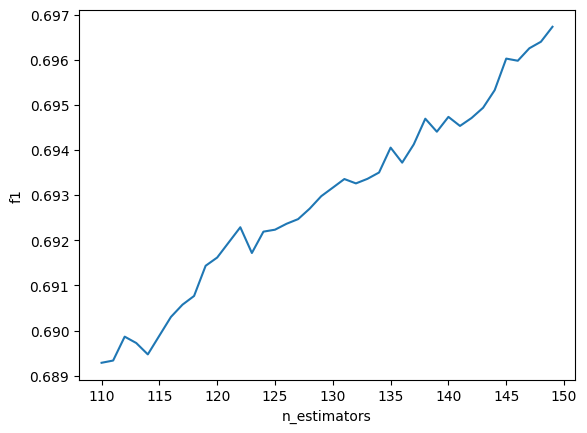

In [ ]:
sns.lineplot(data=df_res,x='n_estimators',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,n_estimators,f1
39,149,0.696732
38,148,0.696401
37,147,0.696256
35,145,0.696027
36,146,0.695980


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(n_estimators = 149, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6842105263157895,
 0.6896057347670251,
 0.7044734061289186,
 0.7011866235167206,
 0.7041857193105874]

In [ ]:
np.mean(gb_scores_default)

0.6967324020078082

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.6967324020078082 0.6842105263157895 0.7044734061289186


# 10 experiment

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(2, 30):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(min_samples_split=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(2, 0.6867508837683183),
 (3, 0.6878070264495976),
 (4, 0.6865642999510075),
 (5, 0.6861887211886236),
 (6, 0.6861887211886236),
 (7, 0.6861887211886236),
 (8, 0.6867285477940569),
 (9, 0.6867285477940569),
 (10, 0.6867285477940569),
 (11, 0.6867285477940569)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['min_samples_split','f1'])
df_res.tail()

,min_samples_split,f1
23,25,0.687498
24,26,0.687541
25,27,0.687346
26,28,0.687553
27,29,0.687732


<Axes: xlabel='min_samples_split', ylabel='f1'>

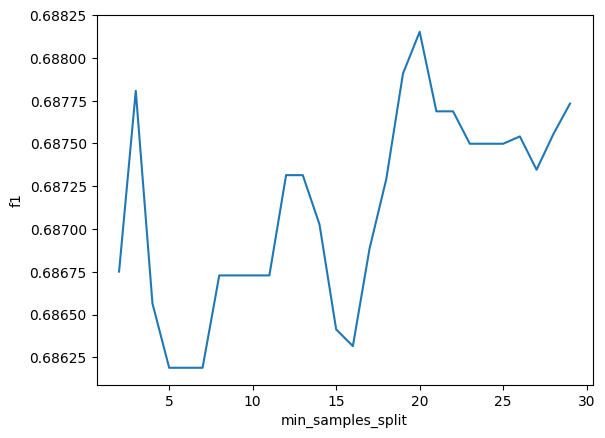

In [ ]:
sns.lineplot(data=df_res,x='min_samples_split',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,min_samples_split,f1
18,20,0.688152
17,19,0.687908
1,3,0.687807
27,29,0.687732
19,21,0.687687


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(min_samples_split = 20, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6726943942133815,
 0.6802473626773372,
 0.696085409252669,
 0.6927252985884907,
 0.6990084985835694]

In [ ]:
np.mean(gb_scores_default)

0.6881521926630896

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.6881521926630896 0.6726943942133815 0.6990084985835694


# 11 experiment

In [ ]:
gb_scores_default = []
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]

for lr in learning_rates:
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(learning_rate=lr, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((lr, np.mean(scores)))

gb_scores_default[:10]


'gb_scores_default = []\nfor x in np.arange(130, 160):\n    skf = StratifiedKFold(n_splits=5)\n    scores = []\n    for train_index, test_index in skf.split(X, y):\n        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]\n        y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n        clf = GradientBoostingClassifier(learning_rate=x, random_state=13)\n        clf.fit(X_train, y_train)\n        y_pred = clf.predict(X_test)\n        scores.append(f1_score(y_test, y_pred))\n    gb_scores_default.append((x, np.mean(scores)))\n\ngb_scores_default[:10]'

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['learning_rate','f1'])
df_res.tail()

,learning_rate,f1
3,0.2,0.705171
4,0.3,0.711660
5,0.5,0.710539
6,0.7,0.712668
7,1.0,0.704759


<Axes: xlabel='learning_rate', ylabel='f1'>

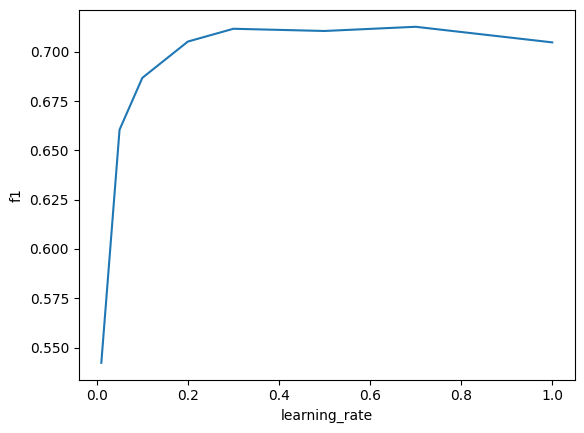

In [ ]:
sns.lineplot(data=df_res,x='learning_rate',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,learning_rate,f1
6,0.7,0.712668
4,0.3,0.711660
5,0.5,0.710539
3,0.2,0.705171
7,1.0,0.704759


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(learning_rate = 0.7, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.7007901064926142,
 0.6984347826086956,
 0.7167902899527984,
 0.7221644120707597,
 0.7251621713895527]

In [ ]:
np.mean(gb_scores_default)

0.7126683525028841

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.7126683525028841 0.6984347826086956 0.7251621713895527





# 12 experiment

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(2, 20):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(max_depth=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(2, 0.6619224944445379),
 (3, 0.6867508837683183),
 (4, 0.7033064805706106),
 (5, 0.7119629513903342),
 (6, 0.7145916225834565),
 (7, 0.7146033602305557),
 (8, 0.7156034561241678),
 (9, 0.712308904840853),
 (10, 0.7085890193010429),
 (11, 0.6972818319363294)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['max_depth','f1'])
df_res.tail()

,max_depth,f1
13,15,0.671452
14,16,0.665474
15,17,0.666691
16,18,0.659928
17,19,0.659446


<Axes: xlabel='max_depth', ylabel='f1'>

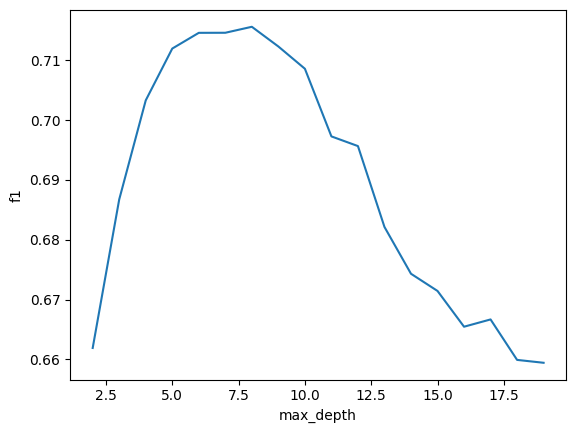

In [ ]:
sns.lineplot(data=df_res,x='max_depth',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,max_depth,f1
6,8,0.715603
5,7,0.714603
4,6,0.714592
7,9,0.712309
3,5,0.711963


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(max_depth = 8, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6979773740143983,
 0.7094105480868665,
 0.7220918538384177,
 0.7247994419253575,
 0.7237380627557981]

In [ ]:
np.mean(gb_scores_default)

0.7156034561241678

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.7156034561241678 0.6979773740143983 0.7247994419253575


# 13 experiment

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(2, 40):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(max_features=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(2, 0.6680891911468615),
 (3, 0.675288653757546),
 (4, 0.6793992656693206),
 (5, 0.6797034223725182),
 (6, 0.6814419036161634),
 (7, 0.6842438617299698),
 (8, 0.6849527907016181),
 (9, 0.6845251485442605),
 (10, 0.6851255498420763),
 (11, 0.685385103713813)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['max_features','f1'])
df_res.tail()

,max_features,f1
33,35,0.686751
34,36,0.686751
35,37,0.686751
36,38,0.686751
37,39,0.686751


<Axes: xlabel='max_features', ylabel='f1'>

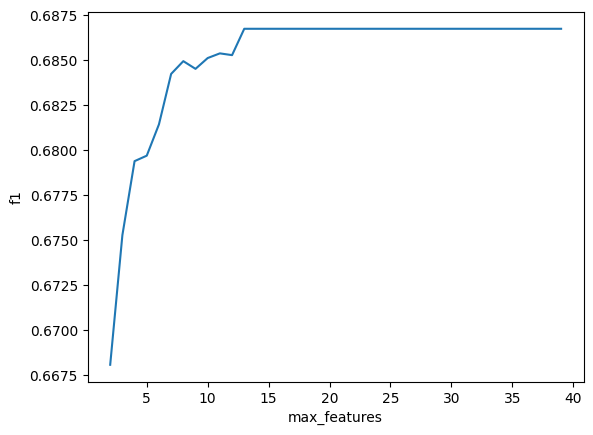

In [ ]:
sns.lineplot(data=df_res,x='max_features',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,max_features,f1
19,21,0.686751
20,22,0.686751
22,24,0.686751
23,25,0.686751
24,26,0.686751


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(max_features = 21, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6769895570759813,
 0.6768336964415396,
 0.6948790896159317,
 0.6910010842067221,
 0.6940509915014165]

In [ ]:
np.mean(gb_scores_default)

0.6867508837683183

In [ ]:
print(np.mean(gb_scores_default), np.min(gb_scores_default), np.max(gb_scores_default))


0.6967324020078082 0.6842105263157895 0.7044734061289186


# random tree clasifier

# 14 experiment

In [ ]:
from sklearn.ensemble import RandomForestClassifier

skf=KFold(n_splits=5)
scores=list()
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    clf=RandomForestClassifier(random_state=13)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    scores.append(f1_score(y_test,y_pred))
scores

[0.658855961405927,
 0.6586455826744586,
 0.6530194472876152,
 0.6703259005145797,
 0.6793333333333333]

In [ ]:
np.mean(scores)

0.6664246214113062

In [ ]:
from sklearn.ensemble import RandomForestClassifier

gb_scores_default = []
for x in np.arange(2, 50):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(min_samples_split=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(2, 0.6656259547990803),
 (3, 0.67234210281237),
 (4, 0.6734874299697255),
 (5, 0.6768326638263368),
 (6, 0.6800633200102403),
 (7, 0.6836197150551925),
 (8, 0.6853586191308234),
 (9, 0.6866191275759685),
 (10, 0.6868494246443102),
 (11, 0.6868412816343196)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['min_samples_split','f1'])
df_res.tail()

,min_samples_split,f1
43,45,0.691478
44,46,0.690715
45,47,0.689992
46,48,0.691134
47,49,0.690527


<Axes: xlabel='min_samples_split', ylabel='f1'>

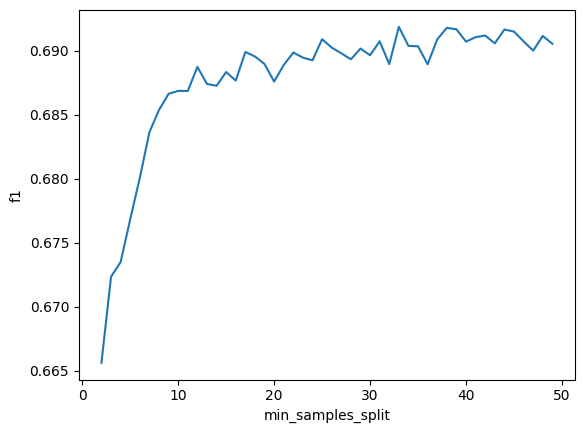

In [ ]:
sns.lineplot(data=df_res,x='min_samples_split',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,min_samples_split,f1
31,33,0.691852
36,38,0.691765
37,39,0.691654
42,44,0.691639
43,45,0.691478


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(min_samples_split = 33, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6737363025804171,
 0.691025186236254,
 0.6910229645093946,
 0.6975920679886686,
 0.7058823529411765]

In [ ]:
np.mean(gb_scores_default)

0.6918517748511822

# 15 experiment

In [ ]:
from sklearn.ensemble import RandomForestClassifier

gb_scores_default = []
for x in np.arange(2, 50):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(max_depth=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(2, 0.3044369646888262),
 (3, 0.5595845129781359),
 (4, 0.607642976361219),
 (5, 0.6205756269130858),
 (6, 0.6312908513618422),
 (7, 0.6412369599037329),
 (8, 0.6517256097824875),
 (9, 0.6573628166859365),
 (10, 0.6645640335282434),
 (11, 0.674945015910119)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['max_depth','f1'])
df_res.tail()

,max_depth,f1
43,45,0.666128
44,46,0.665539
45,47,0.665718
46,48,0.665902
47,49,0.666123


<Axes: xlabel='max_depth', ylabel='f1'>

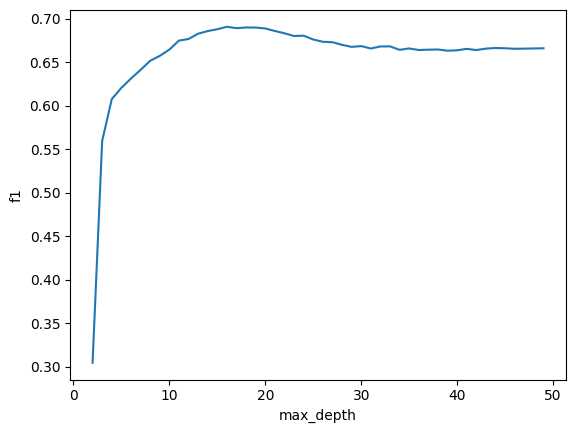

In [ ]:
sns.lineplot(data=df_res,x='max_depth',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,max_depth,f1
14,16,0.690839
16,18,0.690004
17,19,0.689972
15,17,0.689273
18,20,0.688901


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(max_depth = 145, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6560883063125216,
 0.6634974533106961,
 0.6524822695035462,
 0.6774526678141136,
 0.6763611768684478]

In [ ]:
np.mean(gb_scores_default)

0.6651763747618651

# 16 experiment

In [ ]:
from sklearn.ensemble import RandomForestClassifier

gb_scores_default = []
for x in np.arange(150, 175):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(150, 0.6664563879641168),
 (151, 0.6665073685530587),
 (152, 0.666694938703227),
 (153, 0.6663300189624292),
 (154, 0.6661453188527645),
 (155, 0.666010282658235),
 (156, 0.6664110844569),
 (157, 0.6670415927555121),
 (158, 0.6673596613525463),
 (159, 0.667363078391428)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['n_estimators','f1'])
df_res.tail()

,n_estimators,f1
20,170,0.667451
21,171,0.667233
22,172,0.667004
23,173,0.667047
24,174,0.667225


<Axes: xlabel='n_estimators', ylabel='f1'>

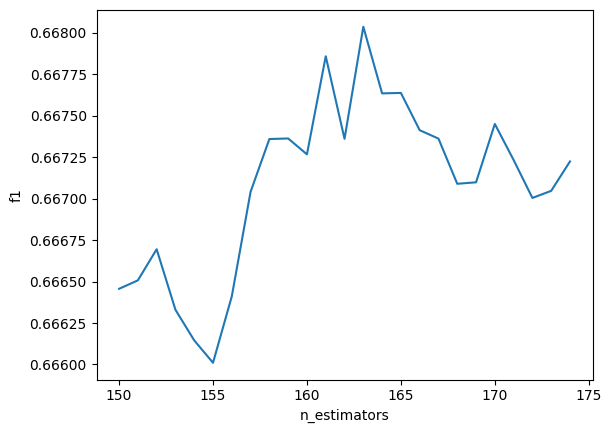

In [ ]:
sns.lineplot(data=df_res,x='n_estimators',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,n_estimators,f1
13,163,0.668037
11,161,0.667859
15,165,0.667638
14,164,0.667635
20,170,0.667451


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(n_estimators = 163, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.659537771645395,
 0.6662148424262961,
 0.6561344537815126,
 0.6790123456790124,
 0.6792835417370733]

In [ ]:
np.mean(gb_scores_default)

0.6680365910538579

# 17 experiment

In [ ]:
from sklearn.ensemble import RandomForestClassifier

gb_scores_default = []
for x in np.arange(175, 205):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(max_depth=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(175, 0.6656259547990803),
 (176, 0.6656259547990803),
 (177, 0.6656259547990803),
 (178, 0.6656259547990803),
 (179, 0.6656259547990803),
 (180, 0.6656259547990803),
 (181, 0.6656259547990803),
 (182, 0.6656259547990803),
 (183, 0.6656259547990803),
 (184, 0.6656259547990803)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['max_depth','f1'])
df_res.tail()

,max_depth,f1
25,200,0.665626
26,201,0.665626
27,202,0.665626
28,203,0.665626
29,204,0.665626


<Axes: xlabel='max_depth', ylabel='f1'>

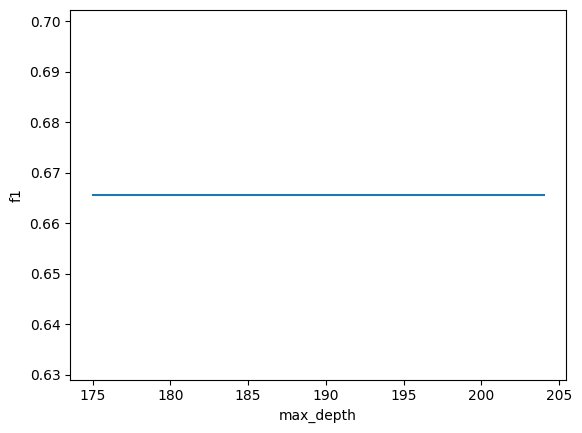

In [ ]:
sns.lineplot(data=df_res,x='max_depth',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,max_depth,f1
0,175,0.665626
1,176,0.665626
28,203,0.665626
27,202,0.665626
26,201,0.665626


In [ ]:
gb_scores_default = []
for n_estimators in range(175, 205):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=179, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((n_estimators, np.mean(scores)))

print(gb_scores_default[:10])

[(175, 0.6671381484299224), (176, 0.6671370684895723), (177, 0.6670021005847658), (178, 0.6674566174474895), (179, 0.6676414674369783), (180, 0.6674671310280501), (181, 0.667328439139797), (182, 0.6676064650458103), (183, 0.6673715505765455), (184, 0.6675060688960531)]


In [ ]:
df_res = pd.DataFrame.from_records(gb_scores_default, columns=['n_estimators', 'f1'])
print(df_res.tail())

    n_estimators        f1
25           200  0.666775
26           201  0.667135
27           202  0.667452
28           203  0.667551
29           204  0.667453


<Axes: xlabel='n_estimators', ylabel='f1'>

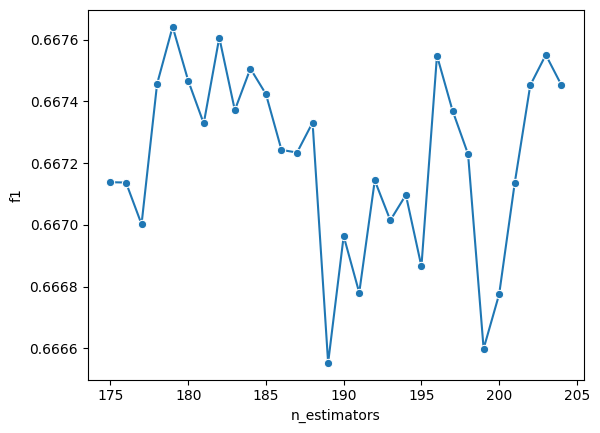

In [ ]:
sns.lineplot(data=df_res, x='n_estimators', y='f1', marker='o')


In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,n_estimators,f1
4,179,0.667641
7,182,0.667606
28,203,0.667551
21,196,0.667548
9,184,0.667506


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(max_depth=179, n_estimators=179, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6597653554175293,
 0.6650879566982408,
 0.6570566543747904,
 0.6787795680493658,
 0.6775178026449644]

In [ ]:
np.mean(gb_scores_default)

0.6676414674369783

In [ ]:

results = [
    {'Algorithm': 'Decision Tree', 'Parameters': 'max_depth=9, min_samples_split=48', 'Metrics score': 0.706},
    {'Algorithm': 'Decision Tree', 'Parameters': 'max_depth=28, min_samples_split=80', 'Metrics score': 0.693},
    {'Algorithm': 'Decision Tree', 'Parameters': 'max_depth=25, min_samples_split=30', 'Metrics score': 0.677},
    {'Algorithm': 'Decision Tree', 'Parameters': 'max_depth=9, min_samples_split=204', 'Metrics score': 0.7079},
    {'Algorithm': 'Decision Tree', 'Parameters': 'max_depth=9, min_samples_split=48', 'Metrics score': 0.704},
    {'Algorithm': 'Decision Tree', 'Parameters': 'max_depth=9, min_samples_split=251', 'Metrics score': 0.704},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'n_estimators=15', 'Metrics score': 0.628},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'n_estimators=40', 'Metrics score': 0.655},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'n_estimators=145', 'Metrics score':0.7044},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'min_samples_split =20', 'Metrics score':0.699},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'learning_rate=0.7', 'Metrics score': 0.72516},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'max_depth=8', 'Metrics score': 0.724},
    {'Algorithm': 'Gradient Boosting', 'Parameters': 'max_features =35', 'Metrics score': 0.7044},
    {'Algorithm': 'Random Forest', 'Parameters': 'min_samples_split=33', 'Metrics score': 0.6918},
    {'Algorithm': 'Random Forest', 'Parameters': 'max_depth=145', 'Metrics score': 0.665},
    {'Algorithm': 'Random Forest', 'Parameters': 'max_depth=163', 'Metrics score': 0.668},
    {'Algorithm': 'Random Forest', 'Parameters': 'n_estimators=179, max_depth=179', 'Metrics score': 0.6676}

]

df_results = pd.DataFrame(results)
print(df_results)



            Algorithm                          Parameters  Metrics score
0       Decision Tree   max_depth=9, min_samples_split=48        0.70600
1       Decision Tree  max_depth=28, min_samples_split=80        0.69300
2       Decision Tree  max_depth=25, min_samples_split=30        0.67700
3       Decision Tree  max_depth=9, min_samples_split=204        0.70790
4       Decision Tree   max_depth=9, min_samples_split=48        0.70400
5       Decision Tree  max_depth=9, min_samples_split=251        0.70400
6   Gradient Boosting                     n_estimators=15        0.62800
7   Gradient Boosting                     n_estimators=40        0.65500
8   Gradient Boosting                    n_estimators=145        0.70440
9   Gradient Boosting               min_samples_split =20        0.69900
10  Gradient Boosting                   learning_rate=0.7        0.72516
11  Gradient Boosting                         max_depth=8        0.72400
12  Gradient Boosting                    max_featur

# Porovnanie

1. **Decision Tree**

max_depth:
Najlepší výkon bol dosiahnutý pri nastavení max_depth=9, kde model dosiahol skóre 0.7079.
Väčšie hodnoty (napr. max_depth=28 a max_depth=25) viedli k pretrénovaniu, čo znížilo výkon na testovacích dátach (skóre 0.693 a 0.677).

min_samples_split :
Menšie hodnoty, ako min_samples_split=30, mohli byť náchylné na pretrénovanie.
Väčšie hodnoty, ako min_samples_split=204, zlepšili výsledok. Kombinácia max_depth=9 a min_samples_split=204 dosiahla najlepšie výsledky.

**Gradient Boosting**

learning_rate (Rýchlosť učenia):
Parameter learning_rate=0.7 mal najvýznamnejší vplyv na výkon modelu, kde bolo dosiahnuté najvyššie skóre 0.7251.

n_estimators (počet stromov):
Pri n_estimators=145 model dosiahol skóre 0.7044.
Príliš nízke hodnoty (napr. n_estimators=15) výrazne znížili výkon na skóre 0.628, čo naznačuje potrebu dostatočného počtu stromov.

max_depth (Hĺbka stromov):
max_depth=8 priniesol vynikajúce výsledky s výkonom 0.724, čo ukazuje, že stredná hĺbka je optimálna.
Väčšie hĺbky (napr. max_depth=24) neboli efektívne a dosiahli nižšie skóre 0.655.
min_samples_split:
Hodnota min_samples_split=20 umožnila dobrý kompromis (skóre 0.699).

**Random Forest**

n_estimators (Počet stromov):
n_estimators=179 zabezpečil stabilné skóre 0.6676.

max_depth (Maximálna hĺbka stromu):
Väčšia hĺbka stromov, ako napríklad max_depth=163, dosiahla najlepšie výsledky s výkonom 0.668.
Plytšie stromy, ako napríklad max_depth=145, boli mierne menej výkonné s výkonom 0.665.

min_samples_split:
Väčšie hodnoty, ako min_samples_split=33, pomohli kontrolovať pretrénovanie a zabezpečili dobré skóre 0.6918.

# Zhrnutie

Gradient Boosting dosiahol najlepšie výsledky, ale vyžadoval starostlivé ladenie parametrov, najmä learning_rate a max_depth.

Decision Tree poskytol dobré výsledky s jednoduchým modelom, ale je náchylný na pretrénovanie, ak nie sú správne nastavené parametre.

Random Forest bol stabilný a menej citlivý na ladenie parametrov.